In [1]:
#Se importan las librerías necesarias.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Se  sube nuestra base de datos de diabetes
ruta_archivo = "/content/diabetes.csv"

# Se carga el archivo CSV en un DataFrame
df = pd.read_csv(ruta_archivo)

In [2]:
df #visualizamos la data que tenemos

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Podemos observar que se tienen las siguientes columnas: Pregnancies, Glucose, BloodPressure, SkinThickness , Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome.
Consultamos con la base de datos y obtenemos esta descripción para cada columna:
- Edad: Muestra la edad en años.
- Embarazos: Muestra el número de veces que una mujer ha estado embarazada.
- Glucosa: Muestra el nivel de concentración de glucosa en plasma.
- Presión arterial: Muestra la presión arterial diastólica en mm Hg.
- Grosor de la piel: Muestra el grosor de la piel del tríceps en mm.
- Insulina
- IMC: Muestra el índice de masa corporal en Kg/m2.
- Función de pedigrí de la diabetes: Esta función evalúa la probabilidad de diabetes.
- Resultado: Es 0 o 1. Aquí, 0 significa que una mujer no tiene diabetes y 1 significa que una mujer tiene diabetes.

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


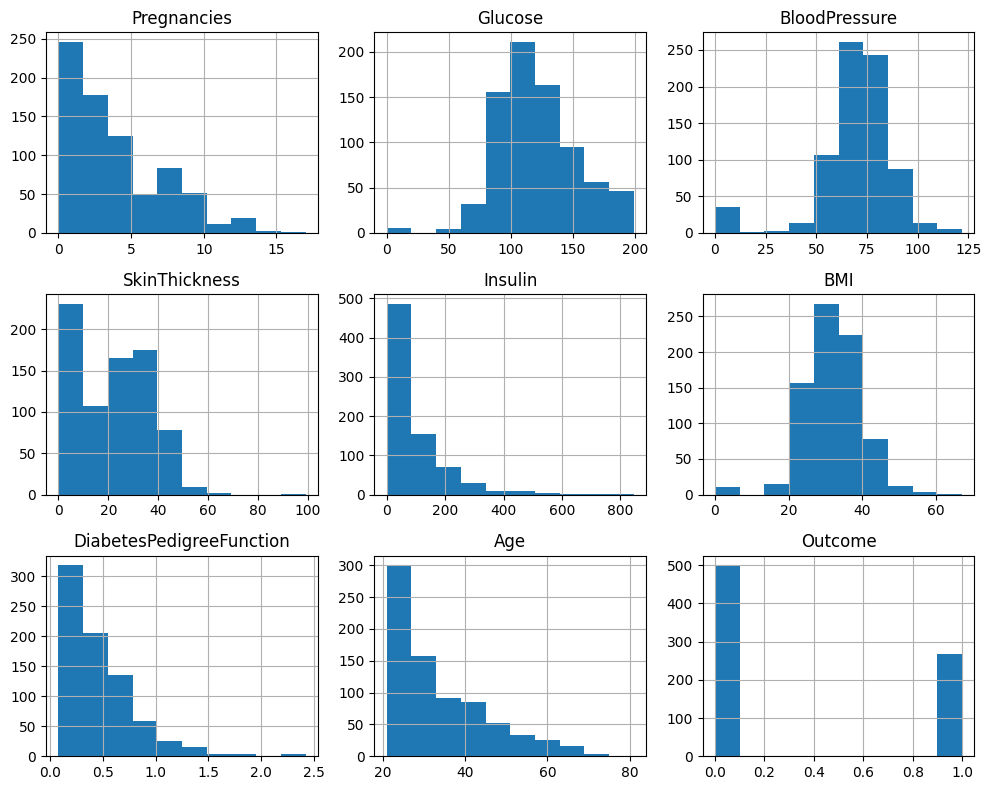

In [4]:
df.hist(figsize=(10, 8))
plt.tight_layout()  # Ahora vemos los histogramas de los features
plt.show()

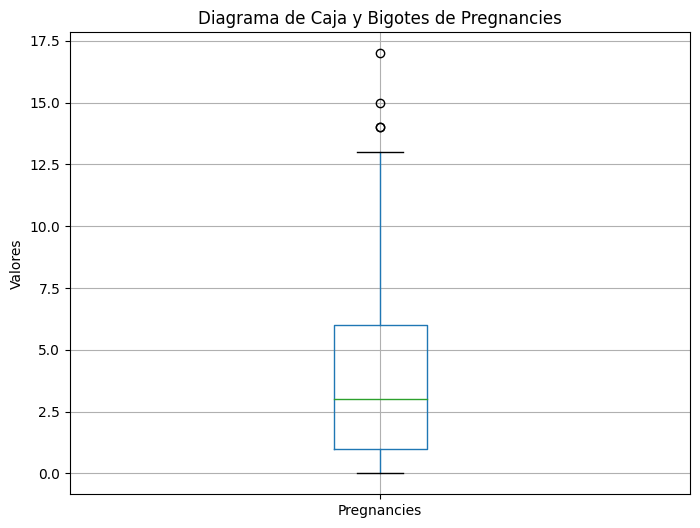

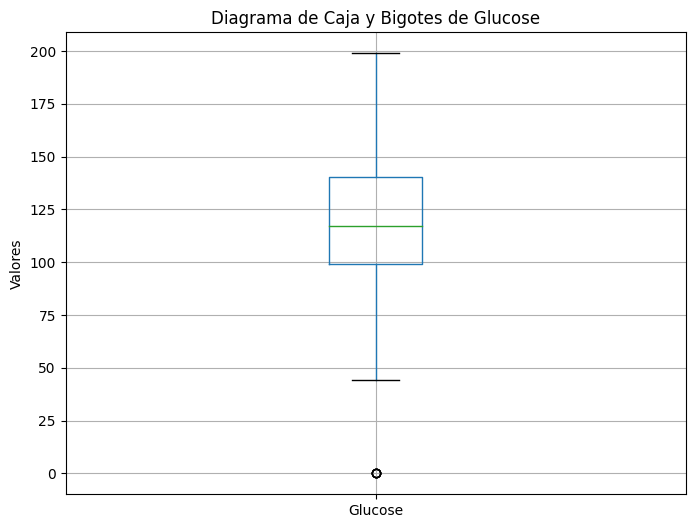

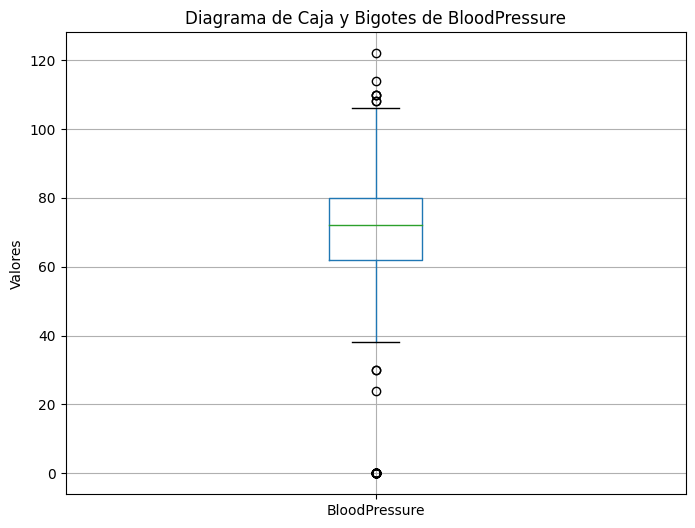

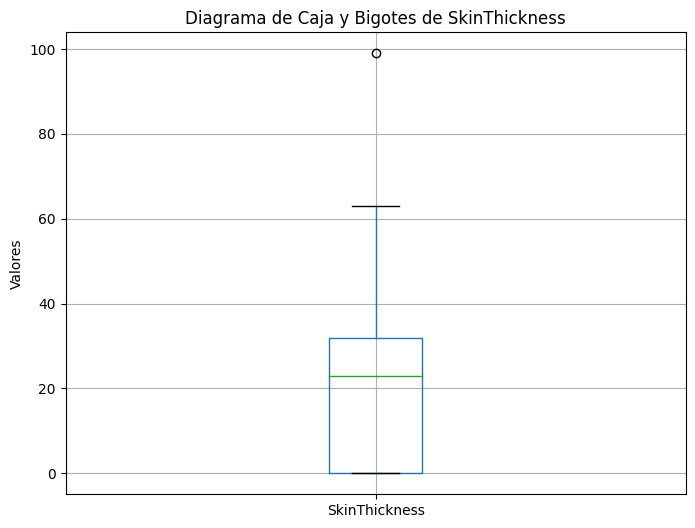

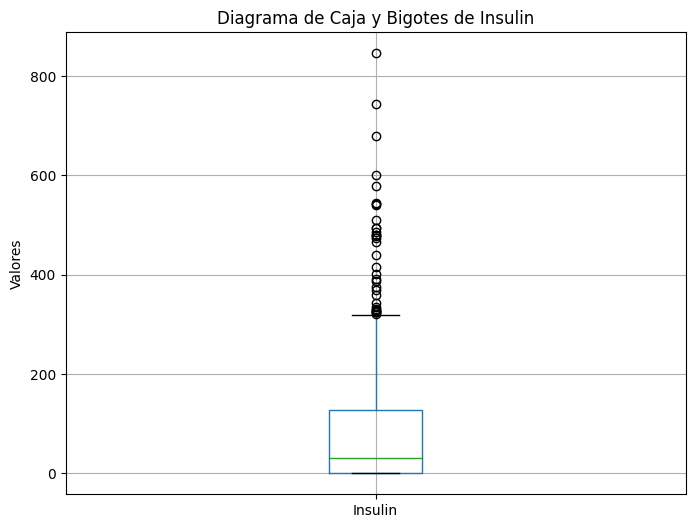

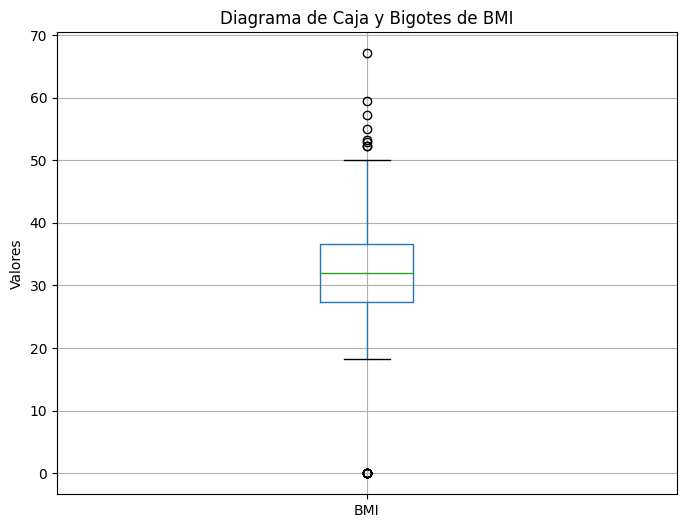

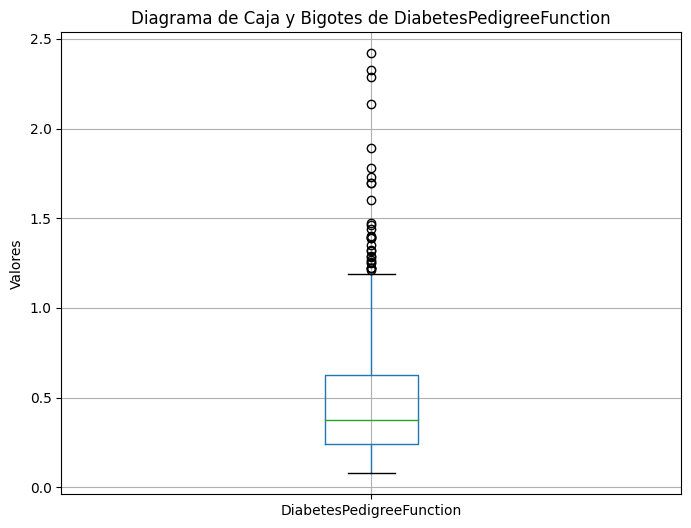

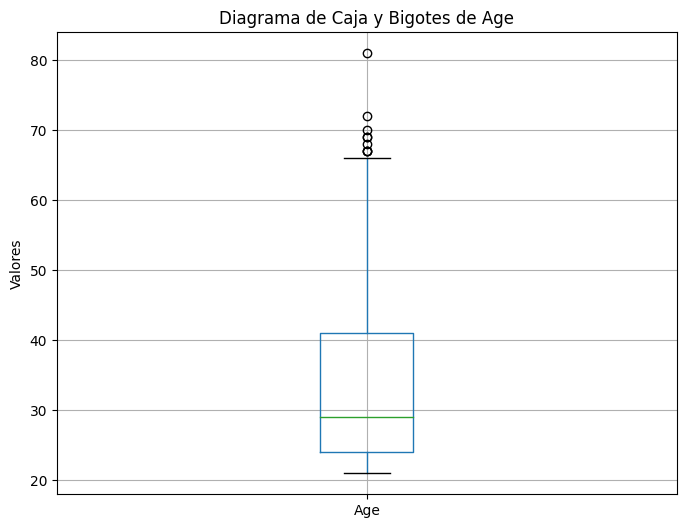

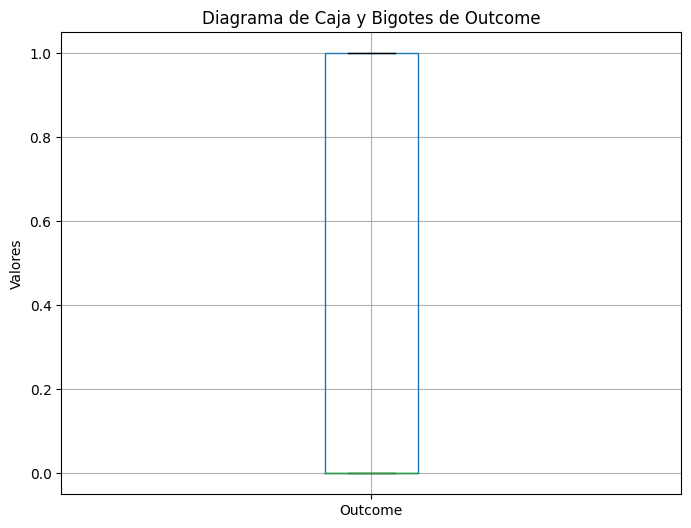

In [5]:
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

# Creamos un bucle para poder ver el boxplot de cada feature y poder ver los outliers
for columna in columnas_numericas:
    plt.figure(figsize=(8, 6))
    df.boxplot(column=columna)
    plt.title('Diagrama de Caja y Bigotes de {}'.format(columna))
    plt.ylabel('Valores')
    plt.grid(True)
    plt.show()

In [6]:
(df['BMI'] == 0).sum()
#Notamos que hay features con valores no posibles. Como por ejemplo:
#BMI no puede ser igual a 0, es imposible que una persona tenga BMI=0, de igual forma con la glucosa, el skin thickness, blood pressure, en insuline también
#tenemos valores de hasta 800.

11

In [7]:
# Lista de variables a las que se les eliminarán los outliers
variables_a_limpiar = ['Glucose', 'BloodPressure', 'BMI', 'SkinThickness', 'Insulin']

# Iterar sobre cada variable y eliminar los outliers
for variable in variables_a_limpiar:
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 3 * IQR
    limite_superior = Q3 + 3 * IQR

    df = df[(df[variable] >= limite_inferior) & (df[variable] <= limite_superior)]

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
df = df[df['Glucose'] != 0]
df = df[df['BloodPressure'] != 0]
df = df[df['BMI'] != 0] #También eliminamos los valores que no pueden ser 0
df = df[df['SkinThickness'] != 0]


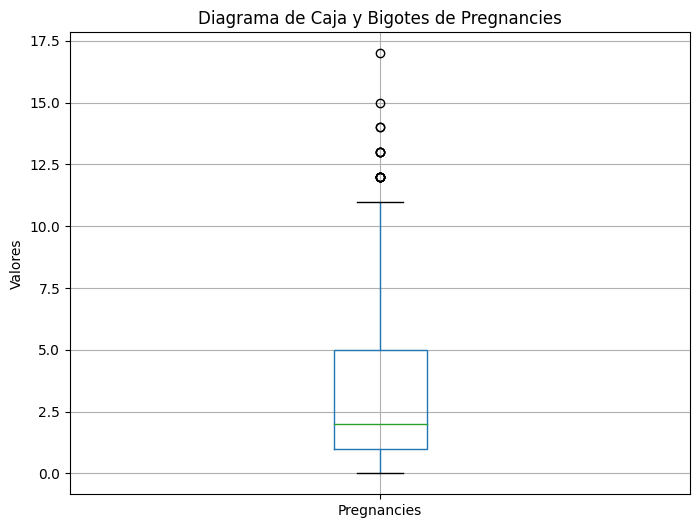

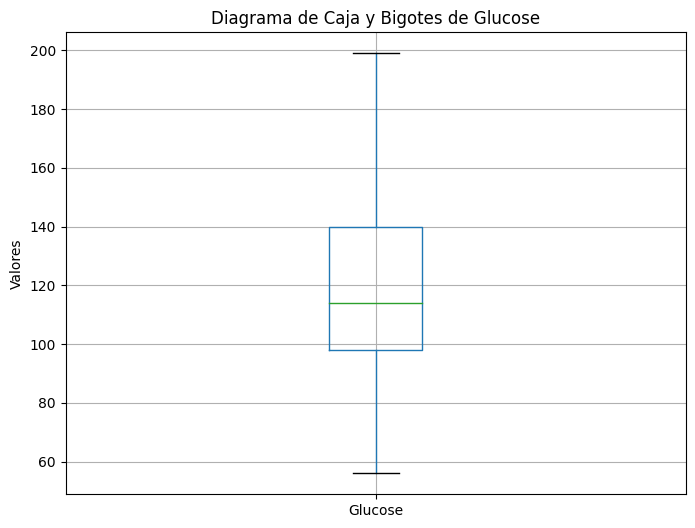

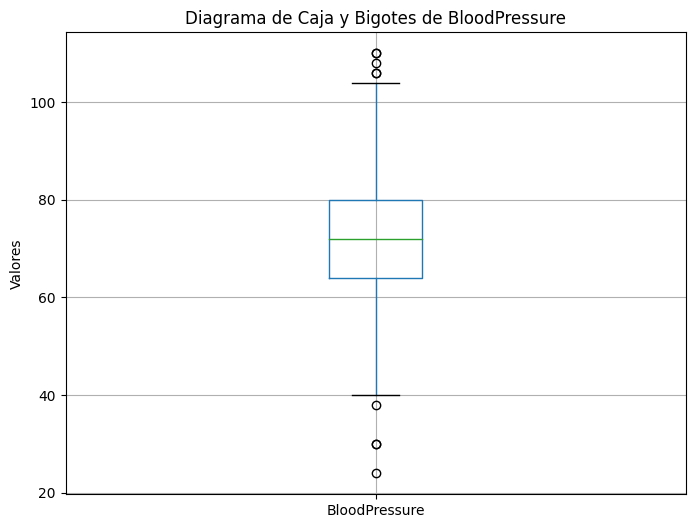

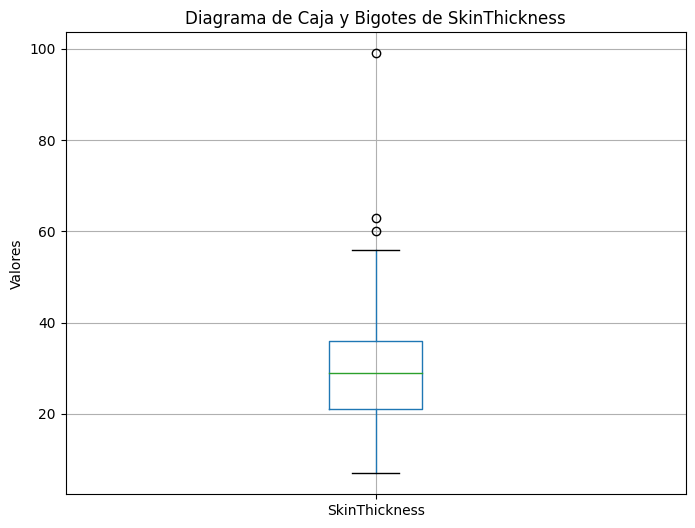

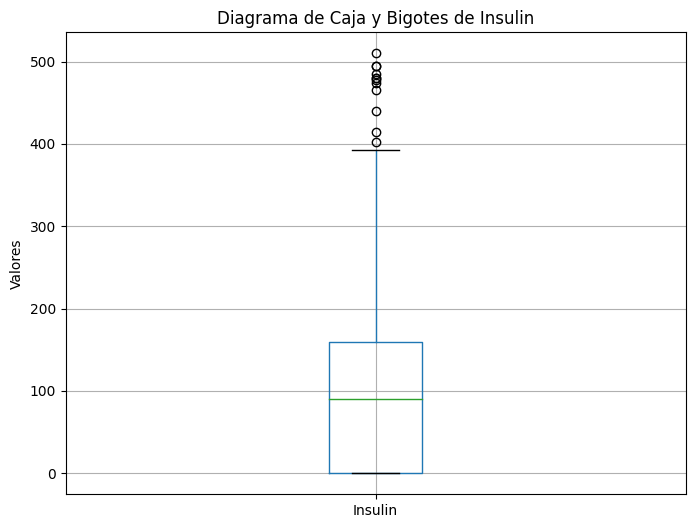

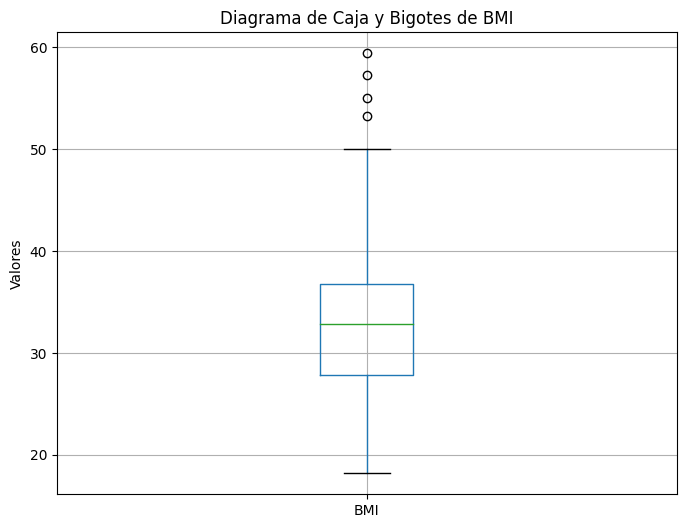

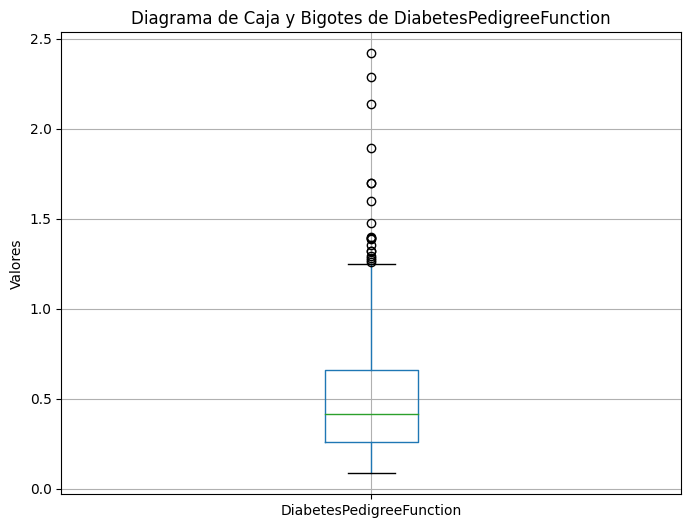

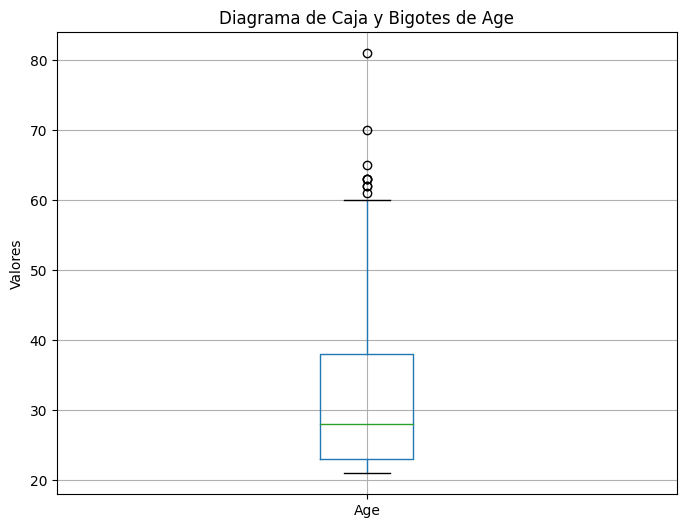

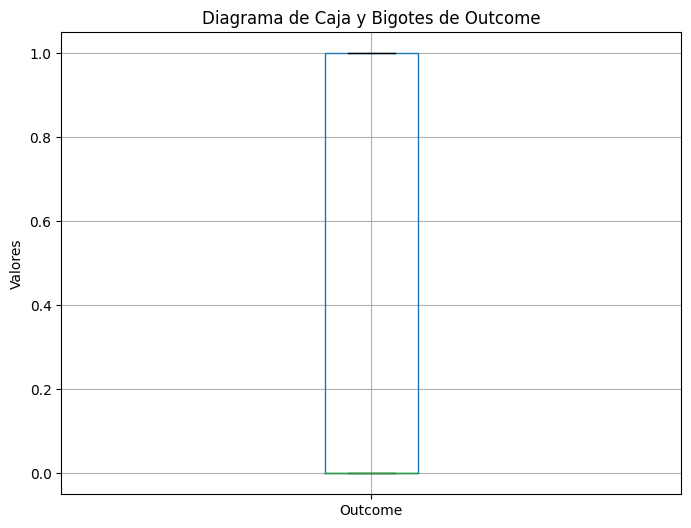

In [9]:
olumnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

# Creamos un bucle para poder ver el boxplot de cada feature y poder ver los outliers
for columna in columnas_numericas:
    plt.figure(figsize=(8, 6))
    df.boxplot(column=columna)
    plt.title('Diagrama de Caja y Bigotes de {}'.format(columna))
    plt.ylabel('Valores')
    plt.grid(True)
    plt.show()

In [10]:
df.info() #podemos ver que ahora solo tenemos 523 datos

<class 'pandas.core.frame.DataFrame'>
Index: 523 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               523 non-null    int64  
 1   Glucose                   523 non-null    int64  
 2   BloodPressure             523 non-null    int64  
 3   SkinThickness             523 non-null    int64  
 4   Insulin                   523 non-null    int64  
 5   BMI                       523 non-null    float64
 6   DiabetesPedigreeFunction  523 non-null    float64
 7   Age                       523 non-null    int64  
 8   Outcome                   523 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 40.9 KB


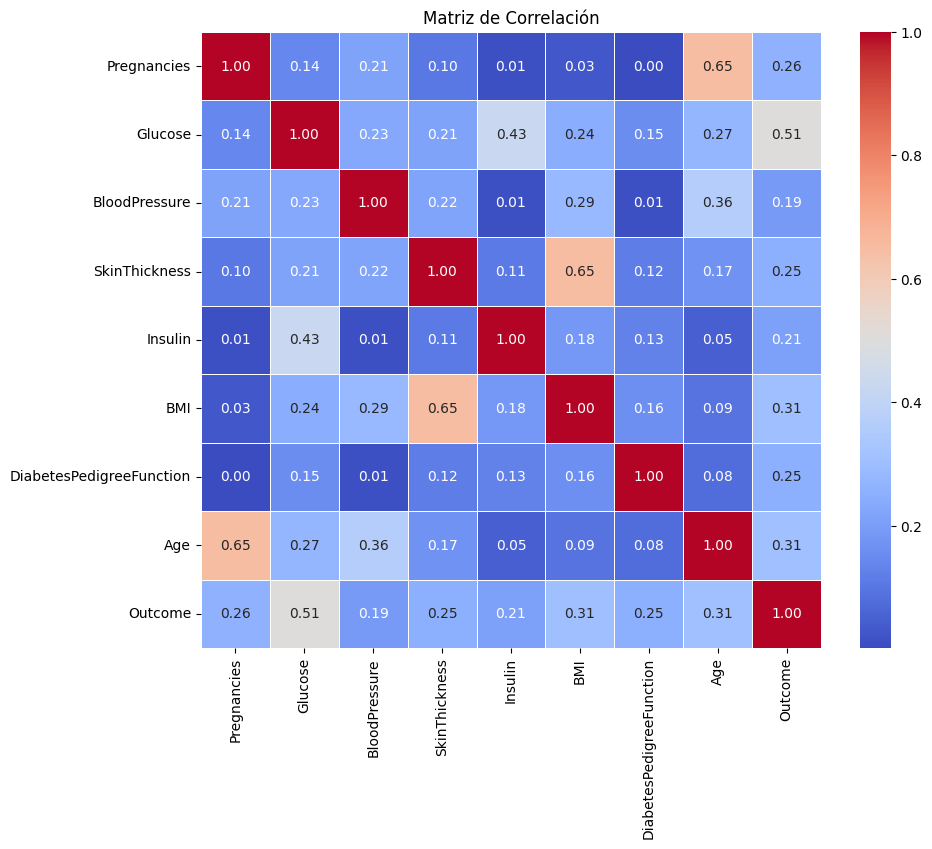

In [11]:
matriz_correlacion = df.corr()

# Visualizar la matriz de correlación en un diagrama de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

Ahora usamos Grind_search para poder ver los mejores valores de mi hiperparametros : C, kernel y gamma

In [12]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform, randint

# Definir los rangos de hiperparámetros a explorar
param_dist = {
    'C': uniform(0.1, 10),  # Rango de valores para el parámetro de regularización C
    'gamma': uniform(0.001, 1),  # Rango de valores para el parámetro gamma del kernel
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']  # Diferentes tipos de kernel
}

# Inicializar el clasificador SVM
svm = SVC()

# Inicializar la búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(svm, param_distributions=param_dist, n_iter=1, cv=5, random_state=42)

# Entrenar el modelo
random_search.fit(df.drop('Outcome', axis=1), df['Outcome'])

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros encontrados:", random_search.best_params_)


Mejores parámetros encontrados: {'C': 3.845401188473625, 'gamma': 0.9517143064099162, 'kernel': 'rbf'}


In [16]:
from sklearn.model_selection import cross_val_score

# Utilizando los mejores parámetros encontrados
best_C = 3.845401188473625
best_gamma = 0.9517143064099162
best_kernel = 'rbf'

# Inicializar el clasificador SVM con los mejores parámetros
svm_best = SVC(C=best_C, gamma=best_gamma, kernel=best_kernel)

# Realizar la validación cruzada
scores = cross_val_score(svm_best, df.drop('Outcome', axis=1), df['Outcome'], cv=5)

# Imprimir los resultados de la validación cruzada
print("Accuracy promedio durante la validación cruzada:", scores.mean())


Accuracy promedio durante la validación cruzada: 0.6510482981071216


Ahora usaremos un pipeline, por lo que subiremos nuestro datafrae original otra vez

In [13]:
ruta_archivo = "/content/diabetes.csv"

# Se carga el archivo CSV en un DataFrame
df = pd.read_csv(ruta_archivo)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Definir el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escalado de características
    ('feature_selector', SelectKBest(f_classif, k=5)),  # Selector de características
    ('pca', PCA(n_components=3)),  # Reducción de dimensionalidad con PCA
    ('svm', SVC(C=3.845401188473625, gamma=0.9517143064099162, kernel='rbf'))  # SVM con mejores hiperparámetros
])

# Realizar la validación cruzada
scores = cross_val_score(pipeline, df.drop('Outcome', axis=1), df['Outcome'], cv=5)

# Imprimir los resultados de la validación cruzada
print("Accuracy promedio durante la validación cruzada:", scores.mean())


Accuracy promedio durante la validación cruzada: 0.7279178338001867
